Name : Fredrick Joel

Roll No : 235229106

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

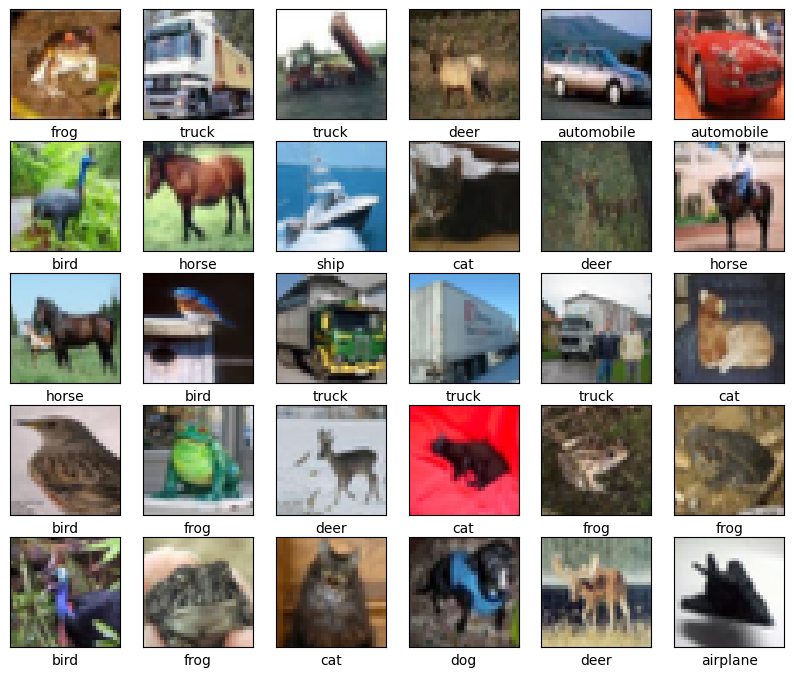

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:

model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.7464 - accuracy: 0.4093 - val_loss: 1.3518 - val_accuracy: 0.5110
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2709 - accuracy: 0.5453 - val_loss: 1.1804 - val_accuracy: 0.5841
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1341 - accuracy: 0.6005 - val_loss: 1.1388 - val_accuracy: 0.5972
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0438 - accuracy: 0.6352 - val_loss: 1.1101 - val_accuracy: 0.6192
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9704 - accuracy: 0.6643 - val_loss: 1.0776 - val_accuracy: 0.6393
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9044 - accuracy: 0.6859 - val_loss: 1.0968 - val_accuracy: 0.6334
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8503 - accuracy: 0.7052 - val_loss: 1.0211 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 3s - loss: 1.0592 - accuracy: 0.6650 - 3s/epoch - 11ms/step
Test accuracy: 0.6650000214576721


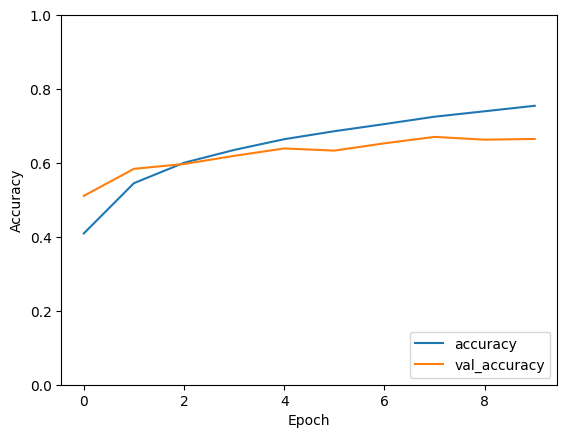

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()